In [61]:
import matplotlib.pyplot as plt
import numpy as np
from math import ceil
from scipy.interpolate import interp1d
from scipy import integrate
from scipy.integrate import odeint

In [62]:
def rocket_lab_program():
    
    NEWTONS_PER_COUNT = 10
    NEWTONS_PER_GRAM = 101.97162
    file_name_end = (input("File in Log Rocket Data? (Without .txt): "))
    propellant_mass_g = float(input("Propellant Mass (g)?: "))
    percent_threshold = float(input("Start Threshold Percent (decimal)?: "))
    Answer_Save_Graph= (input("Save Thrust Graph? (Yes/No)"))
    Answer_Save_Data= (input("Save Thrust Data? (Yes/No)"))
    propellant_mass = 0.001 * propellant_mass_g
    percent_threshold_100 = (percent_threshold * 100)
    str_threshold = str(percent_threshold_100)
    str_thrsehold = (str_threshold)
                                  
    MOTOR_CLASSES = [
    ('1/8A',0),
    ('1/4A',0.3126),
    ('1/2A',0.626),
    ('A',1.26),
    ('B',2.52),
    ('C',5.02),
    ('D',10.01),
    ('E',20.02),
    ('F',40.02),
    ('G',80.02),
    ('H',160.02),
    ('I',320.01),
    ('J',640.01),
    ('K',1280.01),
    ('L',2560.01),
    ('M',5120.01),
    ('N',20480.01),
    ('O',40960.01)
    ]


    start_time = None
    max_thrust = 0.0
    total_impulse = 0.0
    motor_class = ""
    file_name_full = "/Users/augustzentner/Downloads/RocketTestStand-main/Log Rocket Data/" + file_name_end
    with open(file_name_full + ".TXT") as f:
        lines = f.read().split()
        #print('lines = ',lines)
        #print('  > The start_time is ',start_time)
        for line in lines:
            x,y = line.split(',')
            x,y = float(x),float(y)
            y = y / NEWTONS_PER_COUNT
            if y> max_thrust:
                max_thrust = y
        data = []
        for line in lines:
            #print(' The line is ',line)
            x,y = line.split(',')
            x,y = float(x),float(y)
            #print('       x = ',x)
            y = y / NEWTONS_PER_COUNT
            #print('       y = ',y)
            
            start_threshold = float(max_thrust * percent_threshold)
            stop_threshold = float(max_thrust * percent_threshold)
            
            data.append([x,y])
                #print('Appending data right now')
            try:
                total_impulse += y * (xvalue-data[-2][0])
            except:
                pass
            if y > max_thrust:
                max_thrust = y
        
    x_lst = [d[0] for d in data]
    y_lst = [d[1] for d in data]
    
    x_lst = np.array(x_lst)
    y_lst = np.array(y_lst)
    
    is_it_true = y_lst > start_threshold
    i_where = np.flatnonzero(is_it_true)
    
    x_length = len(x_lst)
    
    x_1 = x_lst [i_where[0]-1]
    x_2 = x_lst [i_where[0]]
    
    y_1 = y_lst [i_where[0]-1]
    y_2 = y_lst [i_where[0]]
    
    
    x_t1 = ((x_2 - x_1)/(y_2 - y_1))*(start_threshold - y_1) + x_1
    
    x_1 = x_lst [(i_where[-1])]
    x_2 = x_lst [(i_where[-1]+1)]
    
    y_1 = y_lst [(i_where[-1])]
    y_2 = y_lst [(i_where[-1]+1)]
    
    x_t2 = ((x_2 - x_1)/(y_2 - y_1))*(start_threshold - y_1) + x_1
    
    x_lst = x_lst[(i_where[0]-1):(i_where[-1]+1)]
    y_lst = y_lst[(i_where[0]-1):(i_where[-1]+1)]
    
    x_lst[0] = x_t1
    x_lst[-1] = x_t2
    x_lst= x_lst - x_t1
    
    y_lst[0] = start_threshold
    y_lst[-1] = stop_threshold
    
    n_step_max=5000
    
    burn_time = np.max(x_lst)
    initial_t = np.min(x_lst)
    final_t = np.max(x_lst)
    
    interp_func_th = interp1d(x_lst, y_lst)
    [total_impulse,impulse_error] = integrate.quad(interp_func_th,initial_t,final_t,limit=n_step_max)
    
    for val in MOTOR_CLASSES:
        c,imp = val
    
        if total_impulse > imp:
            motor_class = c
    
    Impulse_per_Gram = total_impulse / propellant_mass_g

    #print('The value of x_lst is ',x_lst)


    return (x_lst, y_lst, propellant_mass, initial_t, final_t, propellant_mass_g, max_thrust, total_impulse, Impulse_per_Gram, motor_class, burn_time, Answer_Save_Graph, Answer_Save_Data, file_name_full, percent_threshold, str_threshold, file_name_end)

In [63]:
def thrust_graph(x_lst, y_lst, max_thrust, propellant_mass_g, total_impulse, Impulse_per_Gram, motor_class, intial_t, burn_time, Answer_Save_Thrust, file_name_full, str_threshold, file_name_end):
      
    fig, ax = plt.subplots(figsize=(10,6))
    plt.plot(x_lst,y_lst)
    plt.title("Thrust Curve")
    plt.ylabel("Thrust (Newtons)")
    plt.xlabel("Time (seconds)")        
    plt.grid(which='major', axis='both')
    plt.xlim(0,burn_time)
    plt.ylim(0,ceil(max_thrust))
    text_str = "Propellant Mass: %.f g" % propellant_mass_g
    text_str += "\nBurn Time: %.2f s" % burn_time
    text_str += "\nMax Thrust: %.2f N" % max_thrust
    text_str += "\nTotal Impulse: %.2f N%ss" % (total_impulse, u"\u00B7")
    text_str += "\nImpulse per gram: %.2f (N%ss)/g" % (Impulse_per_Gram, u"\u00b7")
    text_str += "\nMotor Class: %s" % motor_class
    plt.text(0.75, 0.97, text_str, transform=ax.transAxes,
        verticalalignment='top', bbox=dict(facecolor='white'))
    
    if Answer_Save_Graph == ("Yes" or Answer_Save_Graph == "yes" or Answer_Save_Graph == "1" or Answer_Save_Graph == "YES") :
        plt.savefig( "/Users/augustzentner/Downloads/RocketTestStand-main/Graphs and Slides/" + file_name_end+ "_Graph_" + str_threshold + "%" + ".PDF", format= "pdf")
    plt.show()

In [64]:
def thrust_data_apend(x_lst, y_lst, file_name_full, str_threshold, Answer_Save_Data, file_name_end):
    if Answer_Save_Data == ("Yes" or Answer_Save_Data == "yes" or Answer_Save_Data == "1" or Answer_Save_Data == "YES") :
        
        np.set_printoptions(suppress=1)
        
        x_array = np.array (x_lst)
        y_array = np.array (y_lst)
        
        np.around (x_array, decimals = 3, out= x_array)
        np.around (y_array, decimals = 3, out= y_array)
        
        out_data = np.stack((x_array, y_array), axis = -1)
        
        open(file_name_full + "_apend_" + str_threshold + "%" + ".TXT", 'w').close()
        np.savetxt( file_name_full + "_apend_" + str_threshold + "%" + ".TXT" , (out_data), fmt = '%3.3f', delimiter = ', ')
    

File in Log Rocket Data? (Without .txt):  38mm9(0.15625C)
Propellant Mass (g)?:  174
Start Threshold Percent (decimal)?:  0.1
Save Thrust Graph? (Yes/No) Yes
Save Thrust Data? (Yes/No) Yes


/var/folders/g8/c0l7tdf94tn0kxy2sv51ghmc0000gn/T/ipykernel_60157/3905175500.py:118: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  [total_impulse,impulse_error] = integrate.quad(interp_func_th,initial_t,final_t,limit=n_step_max)


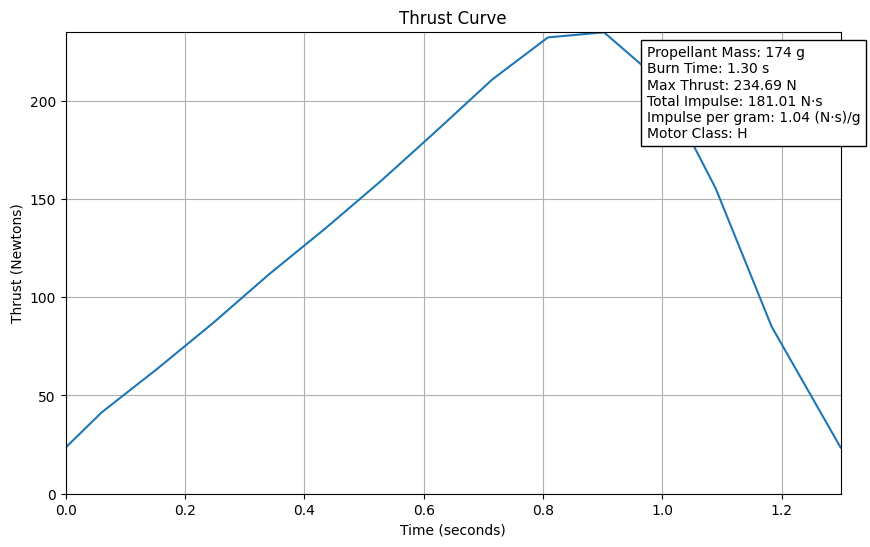

In [65]:
[x_lst, y_lst, propellant_mass, initial_t, final_t, propellant_mass_g, max_thrust, total_impulse, Impulse_per_Gram, motor_class, burn_time, Answer_Save_Graph, Answer_Save_Data, file_name_full, percent_threshold, str_threshold, file_name_end] = rocket_lab_program()

thrust_graph(x_lst, y_lst, max_thrust, propellant_mass_g, total_impulse, Impulse_per_Gram, motor_class, initial_t, burn_time, Answer_Save_Graph, file_name_full, str_threshold, file_name_end)

thrust_data_apend(x_lst, y_lst, file_name_full, str_threshold, Answer_Save_Data, file_name_end)